# Imports 👇

In [2]:
import pandas
import numpy
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
import matplotlib.pyplot as pyplot
from mpl_toolkits import mplot3d

In [127]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

## Data Reading 👇

In [9]:
classes_list=["rice", "maize", "jute", "cotton", "coconut", "papaya", "orange", "apple", "muskmelon", "watermelon", "grapes", "mango", "banana", "pomegranate", "lentil", "blackgram", "mungbean", "mothbeans", "pigeonpeas", "kidneybeans", "chickpea", "coffee"]

In [10]:
data=pandas.read_csv('./Crop_recommendation.csv')

In [50]:
data

N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      class_number  
0                0  
1                0  
2                0  
3                0  
4                0  
...            ...  
2195            21  
2196            21  
2197            21  
2198            21  
2199            21  

[2200 rows x 9 columns]

In [37]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'class_number'],
      dtype='object')

N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   class_number  
0             0  
1             0  
2             0  
3             0  
4             0

In [12]:
data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [22]:

def get_class_number(class_name):
    if class_name=='rice':
        return 0
    if class_name=='maize':
        return 1
    if class_name=='jute':
        return 2
    if class_name=='cotton':
        return 3
    if class_name=='coconut':
        return 4
    if class_name=='papaya':
        return 5
    if class_name=='orange':
        return 6
    if class_name=='apple':
        return 7
    if class_name=='muskmelon':
        return 8
    if class_name=='watermelon':
        return 9
    if class_name=='grapes':
        return 10
    if class_name=='mango':
        return 11
    if class_name=='banana':
        return 12
    if class_name=='pomegranate':
        return 13
    if class_name=='lentil':
        return 14
    if class_name=='blackgram':
        return 15
    if class_name=='mungbean':
        return 16
    if class_name=='mothbeans':
        return 17
    if class_name=='pigeonpeas':
        return 18
    if class_name=='kidneybeans':
        return 19
    if class_name=='chickpea':
        return 20
    if class_name=='coffee':
        return 21

In [24]:
data['class_number']=data['label'].apply(get_class_number)

In [25]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

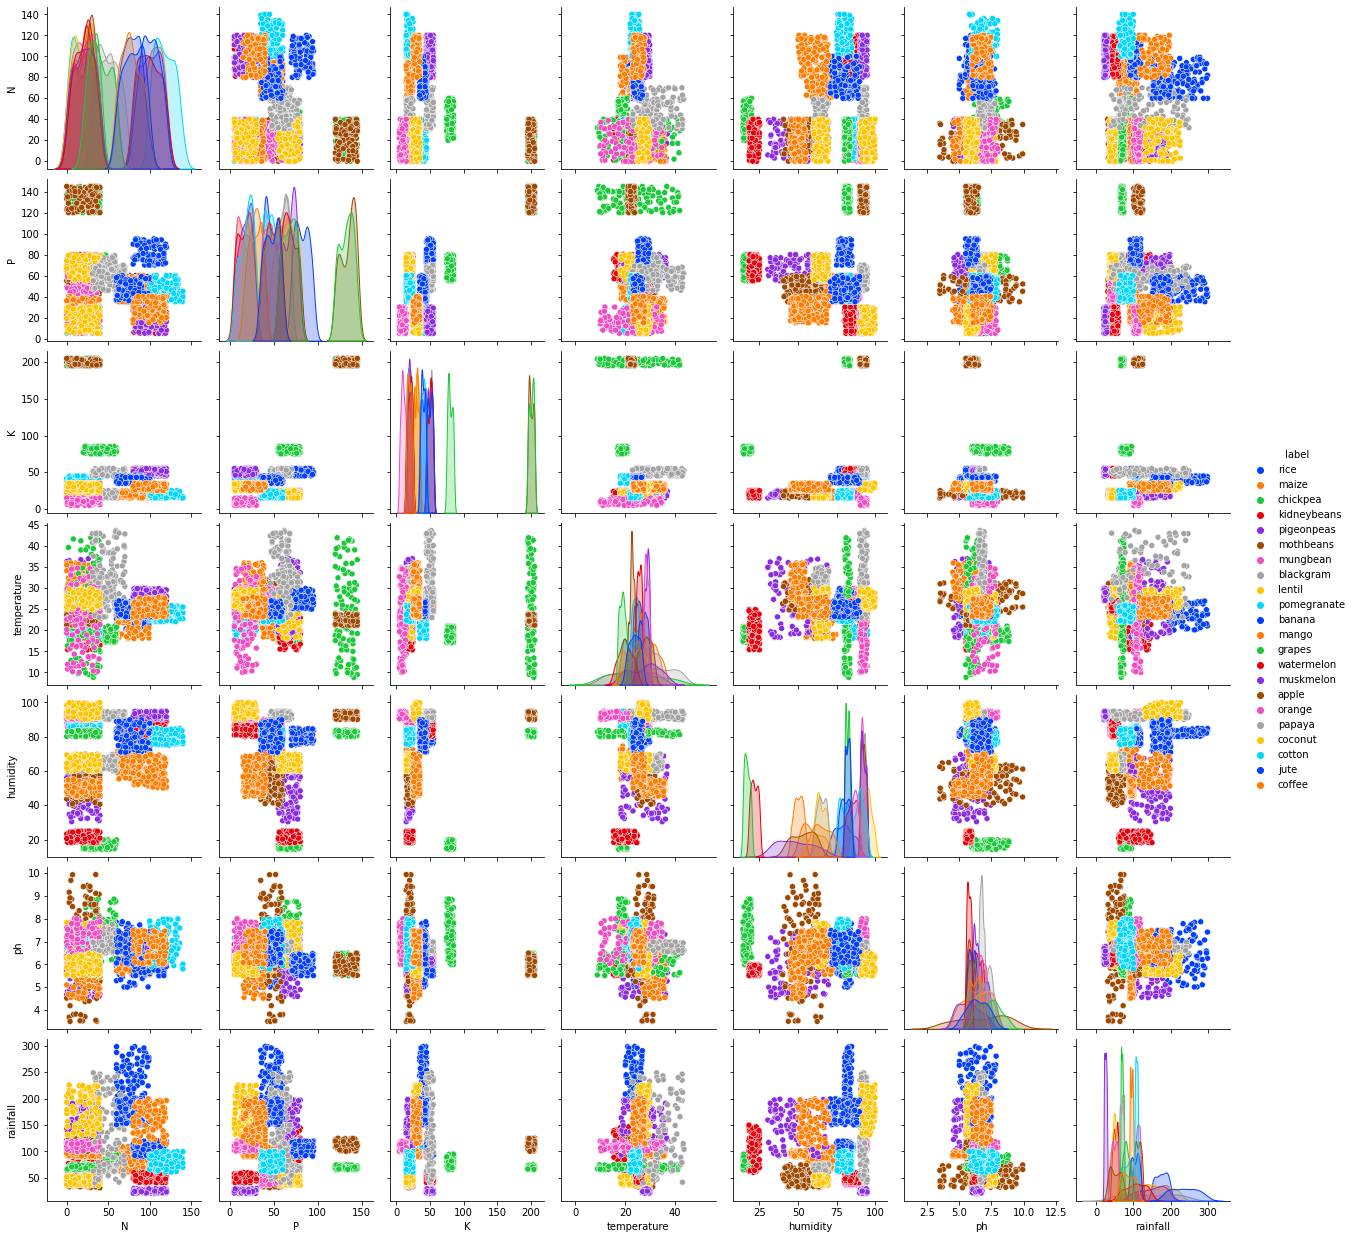

In [19]:
seaborn.pairplot(data[:,:8], hue="label",palette="bright")

<AxesSubplot:xlabel='class_number'>

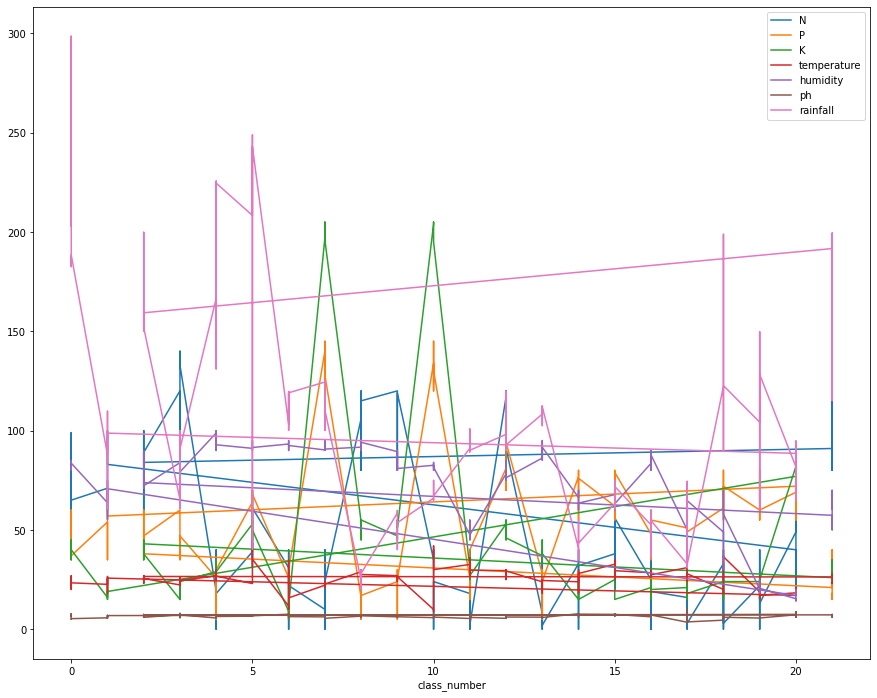

In [43]:
data.plot(kind='line',x='class_number',y=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'],)

Text(0.5, 0, 'K')

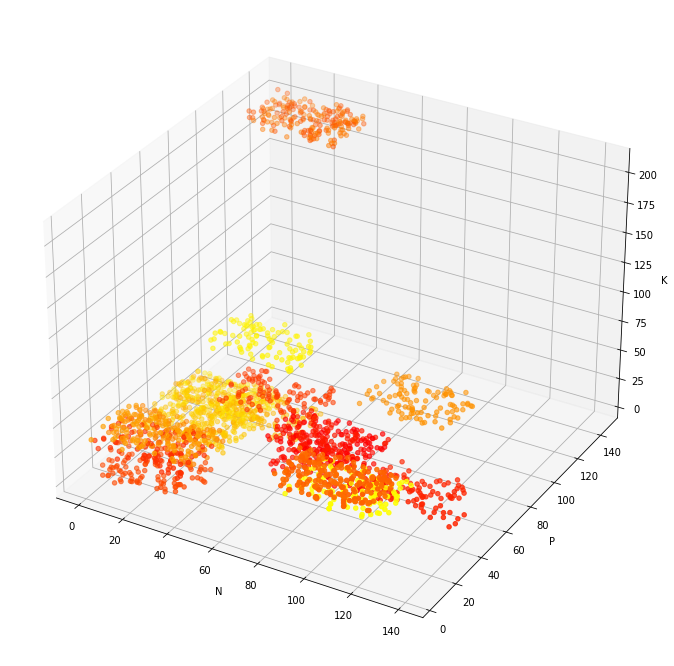

In [44]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(data.to_numpy()[:, 0], data.to_numpy()[:, 1] ,data.to_numpy()[:, 2],c=data['class_number'], cmap='autumn')
plotter.set_xlabel('N')
plotter.set_ylabel('P')
plotter.set_zlabel('K')

In [47]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'class_number'],
      dtype='object')

Text(0.5, 0, 'rainfall')

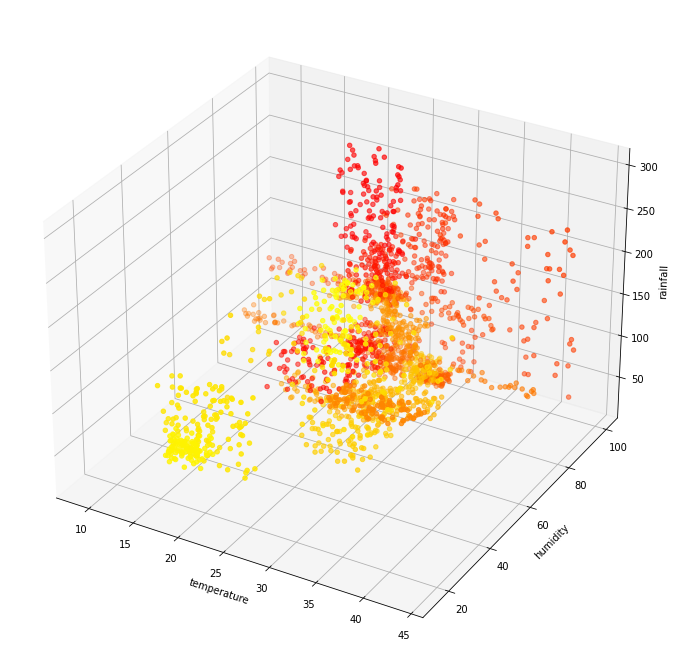

In [48]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(data.to_numpy()[:,3], data.to_numpy()[:, 4] ,data.to_numpy()[:, 6],c=data['class_number'], cmap='autumn')
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

### Suffling the data set 👇
this is to get splitted data, that have all type of the classes in training and testing


In [49]:
shuffled_Data=data.sample(frac=1)

## Splitting the dataset into training and testing 👇

For Training 91% data is being used and for testing 9% data is used from the given data

means 2000 rows will be used for training and 200 rows will be used for testing

In [51]:
Training_Data = shuffled_Data[:2000]
Testing_Data = shuffled_Data[2000:]

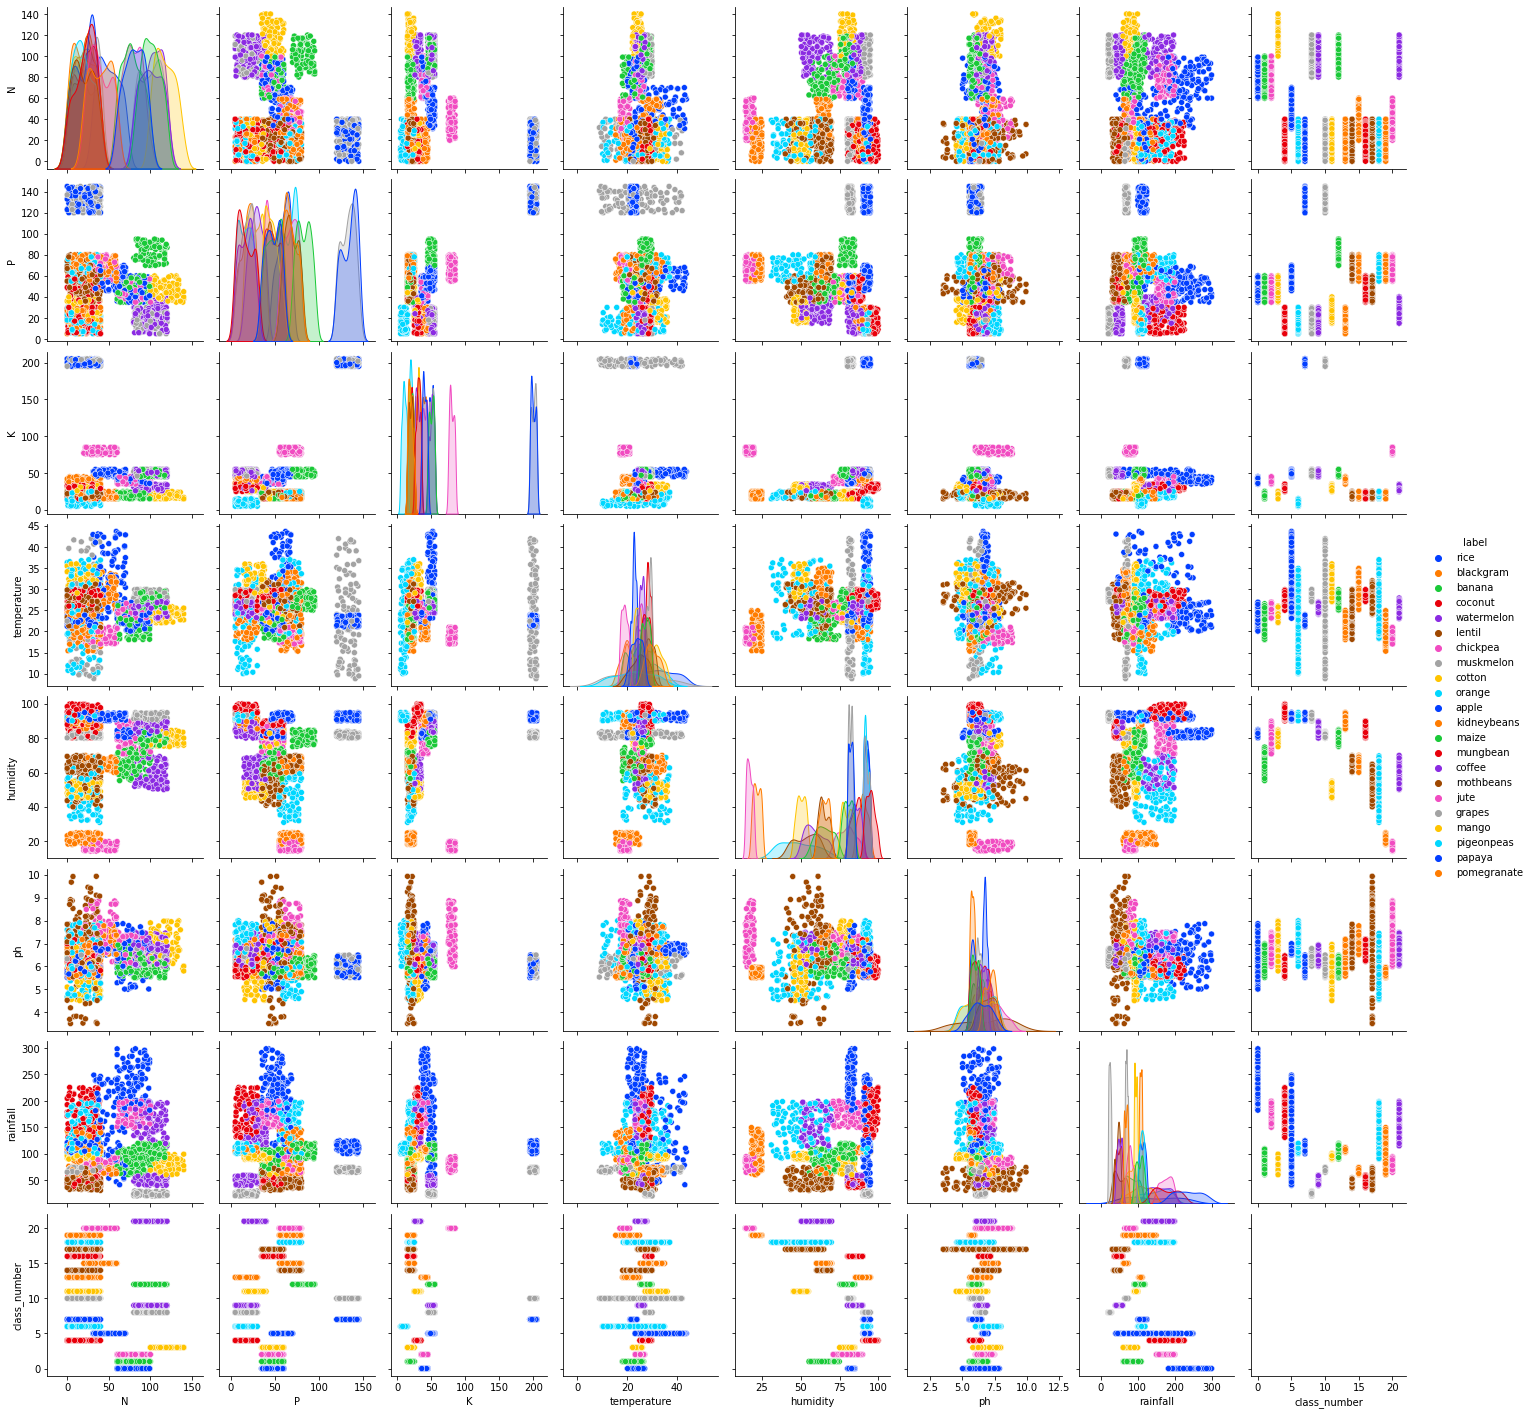

In [53]:
seaborn.pairplot(Training_Data, hue="label",palette="bright")

Text(0.5, 0, 'K')

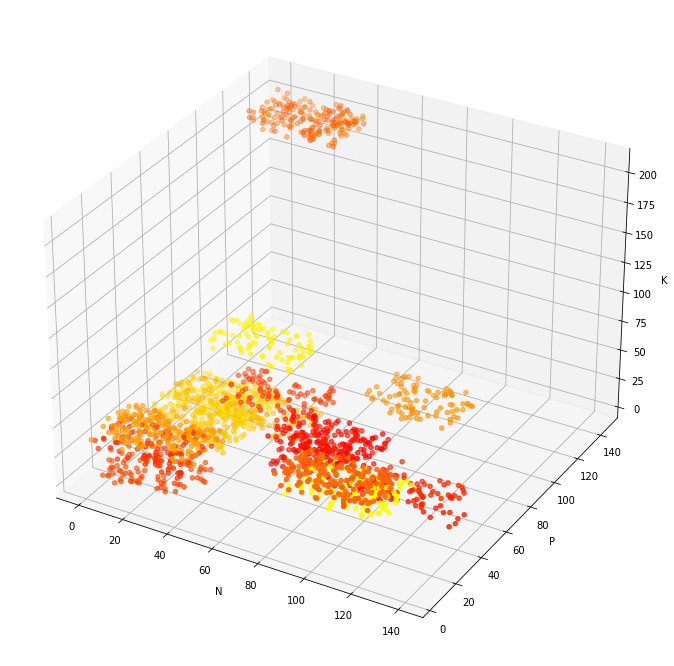

In [55]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(Training_Data.to_numpy()[:, 0], Training_Data.to_numpy()[:, 1] ,Training_Data.to_numpy()[:, 2],c=Training_Data['class_number'], cmap='autumn')
plotter.set_xlabel('N')
plotter.set_ylabel('P')
plotter.set_zlabel('K')

Text(0.5, 0, 'rainfall')

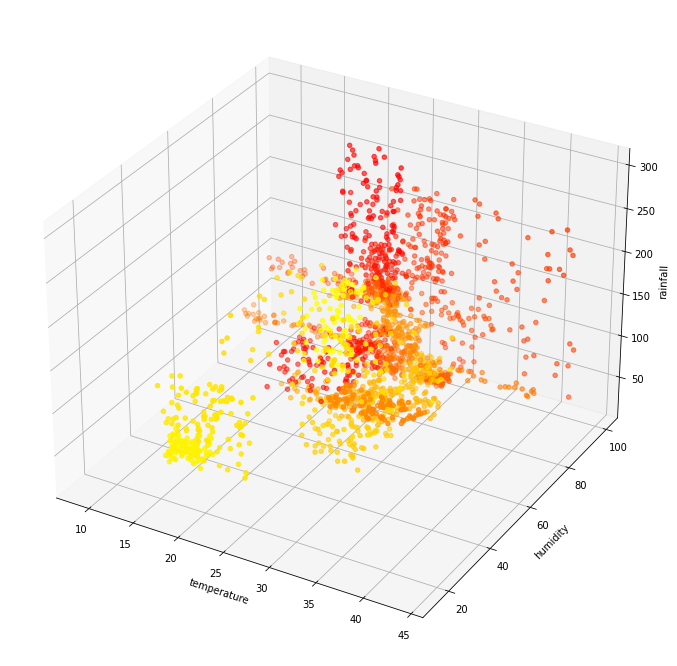

In [110]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(Training_Data.to_numpy()[:,3], Training_Data.to_numpy()[:, 4] ,Training_Data.to_numpy()[:, 6],c=Training_Data['class_number'], cmap='autumn')
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

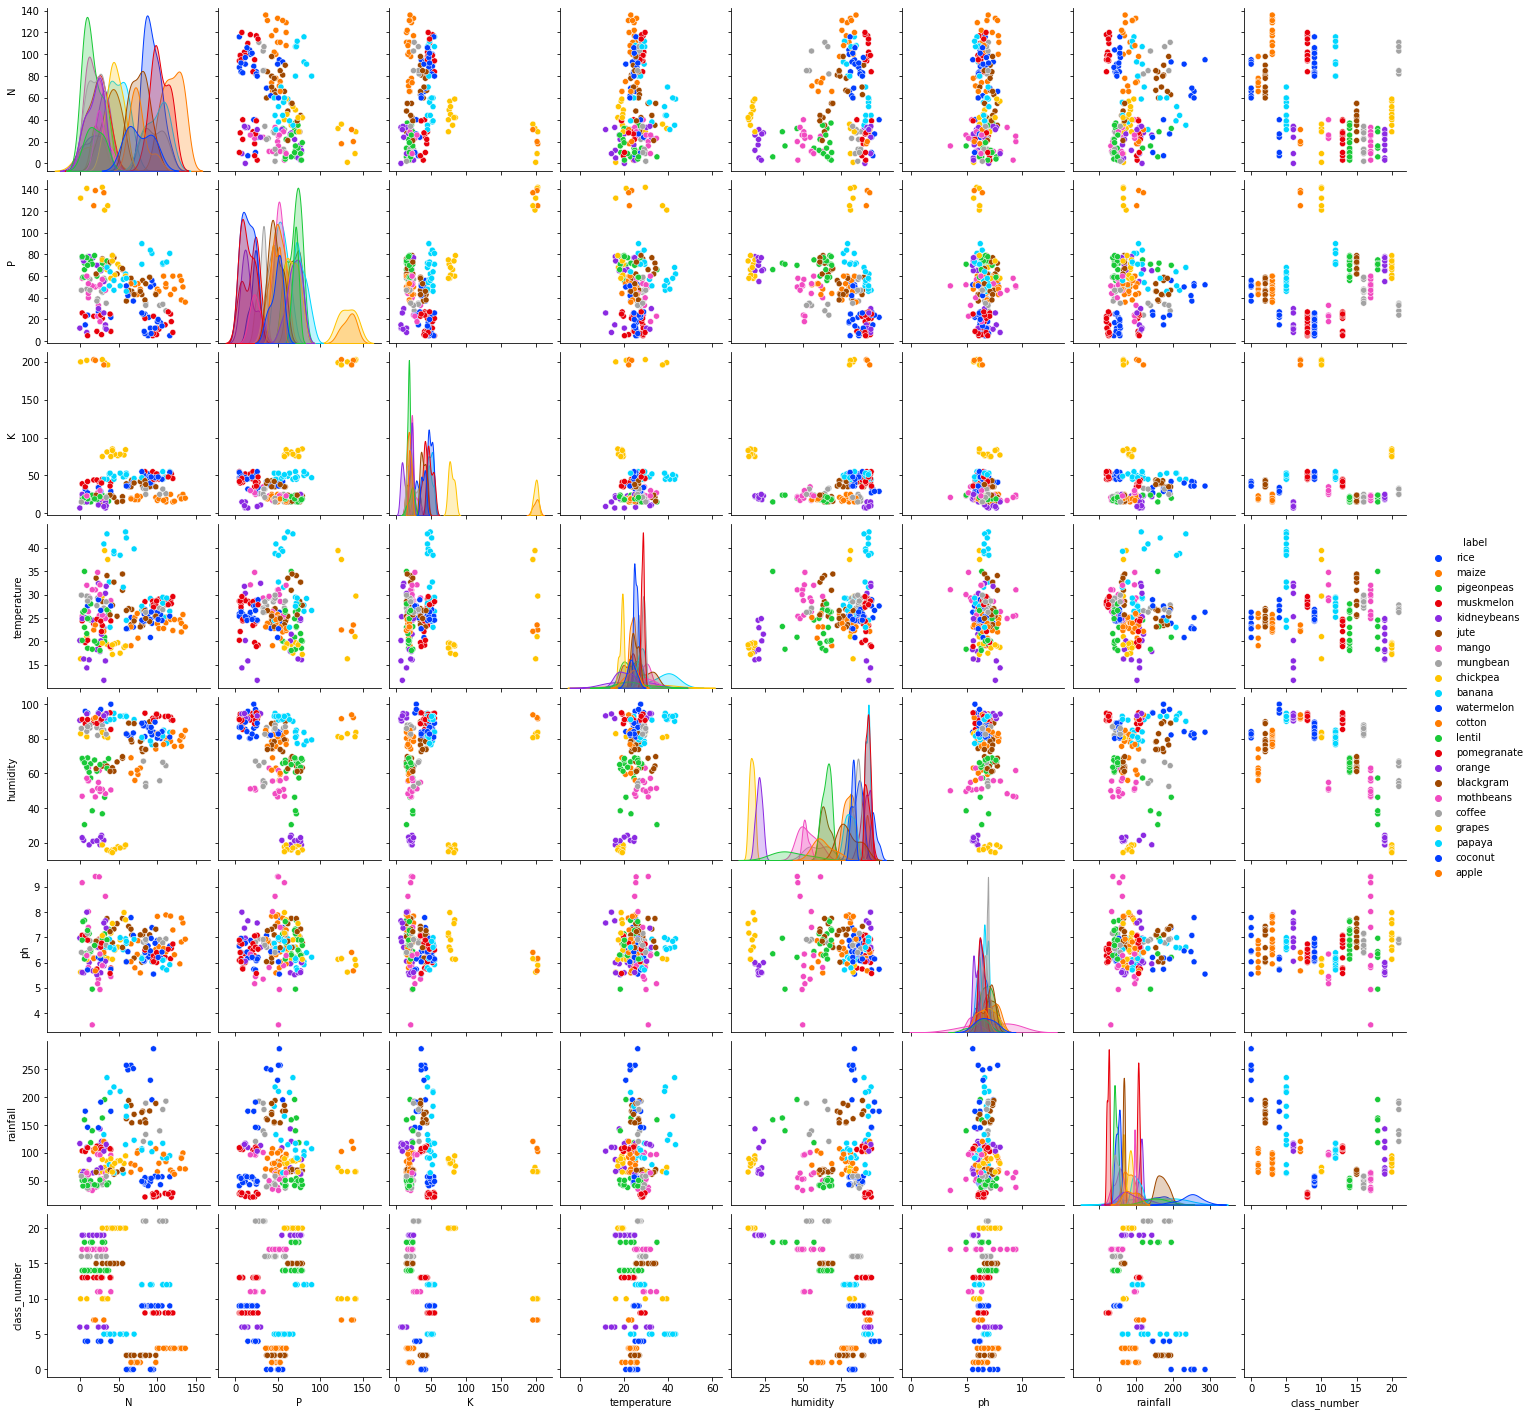

In [54]:
seaborn.pairplot(Testing_Data, hue="label",palette="bright")

Text(0.5, 0, 'K')

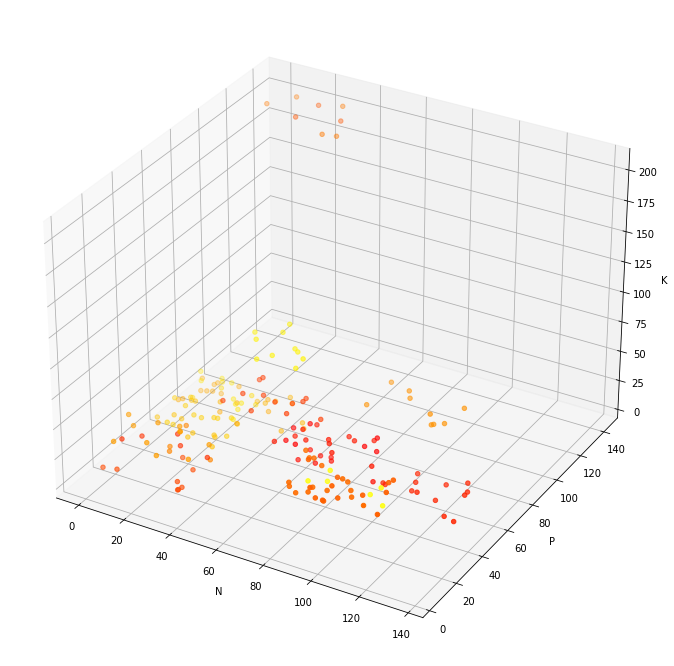

In [56]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(Testing_Data.to_numpy()[:, 0], Testing_Data.to_numpy()[:, 1] ,Testing_Data.to_numpy()[:, 2],c=Testing_Data['class_number'], cmap='autumn')
plotter.set_xlabel('N')
plotter.set_ylabel('P')
plotter.set_zlabel('K')

Text(0.5, 0, 'rainfall')

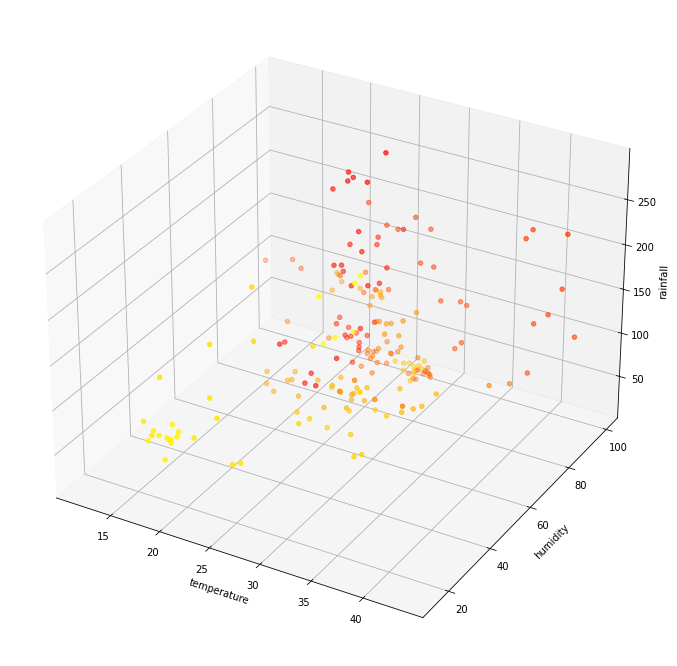

In [111]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(Testing_Data.to_numpy()[:,3], Testing_Data.to_numpy()[:, 4] ,Testing_Data.to_numpy()[:, 6],c=Testing_Data['class_number'], cmap='autumn')
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

## dividing the training data features and labels 👇 
this will be used for training of SVM model

In [82]:
training_Labels=Training_Data['label']
training_class_numbers=Training_Data['class_number']
training_Features=Training_Data.drop(['label','class_number'],axis=1)

In [75]:
training_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 38 to 1624
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2000 non-null   int64  
 1   P            2000 non-null   int64  
 2   K            2000 non-null   int64  
 3   temperature  2000 non-null   float64
 4   humidity     2000 non-null   float64
 5   ph           2000 non-null   float64
 6   rainfall     2000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 189.5 KB


In [106]:
training_Labels.value_counts()

apple          97
mango          96
pigeonpeas     95
coconut        95
grapes         95
coffee         94
rice           93
maize          93
orange         92
blackgram      91
kidneybeans    91
banana         91
chickpea       90
mungbean       89
mothbeans      89
pomegranate    89
jute           88
papaya         88
cotton         87
muskmelon      87
lentil         85
watermelon     85
Name: label, dtype: int64

## dividing the testing data features and labels 👇 
this will be used for testing the logistic regression model

In [76]:
testing_Labels=Testing_Data['label']
testing_class_numbers=Testing_Data['class_number']
testing_Features=Testing_Data.drop(['label','class_number'],axis=1)

In [65]:
testing_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 25 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            200 non-null    int64  
 1   P            200 non-null    int64  
 2   K            200 non-null    int64  
 3   temperature  200 non-null    float64
 4   humidity     200 non-null    float64
 5   ph           200 non-null    float64
 6   rainfall     200 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 20.6 KB


In [66]:
testing_Labels.value_counts()

watermelon     15
lentil         15
cotton         13
muskmelon      13
papaya         12
jute           12
mothbeans      11
mungbean       11
pomegranate    11
chickpea       10
kidneybeans     9
banana          9
blackgram       9
orange          8
rice            7
maize           7
coffee          6
grapes          5
pigeonpeas      5
coconut         5
mango           4
apple           3
Name: label, dtype: int64

# Creating the SVM model instance(object) 👇

In [67]:
model=svm.SVC(kernel='rbf')

### fitting the model 👇

In [68]:
model.fit(training_Features,training_Labels)

SVC()

In [69]:
model.support_vectors_

array([[ 30.        , 122.        , 197.        , ...,  92.72043743,
          5.57324139, 106.1417017 ],
       [ 24.        , 142.        , 202.        , ...,  91.48135786,
          5.71081986, 101.8474768 ],
       [  1.        , 124.        , 199.        , ...,  93.27392415,
          5.65847382, 112.6676589 ],
       ...,
       [101.        ,  11.        ,  51.        , ...,  84.24340241,
          6.79203557,  44.2068997 ],
       [119.        ,   9.        ,  50.        , ...,  83.9195902 ,
          6.25128666,  40.794305  ],
       [ 86.        ,   6.        ,  53.        , ...,  83.47202566,
          6.92184789,  42.10681516]])

In [70]:
model.n_support_

array([26, 37, 81, 30, 43, 47, 48, 26, 69, 52, 73, 73, 52, 72, 63, 42, 50,
       80, 58, 51, 47, 59])

In [71]:
len(model.support_vectors_)

1179

## Visualization of Support Vectors 👇

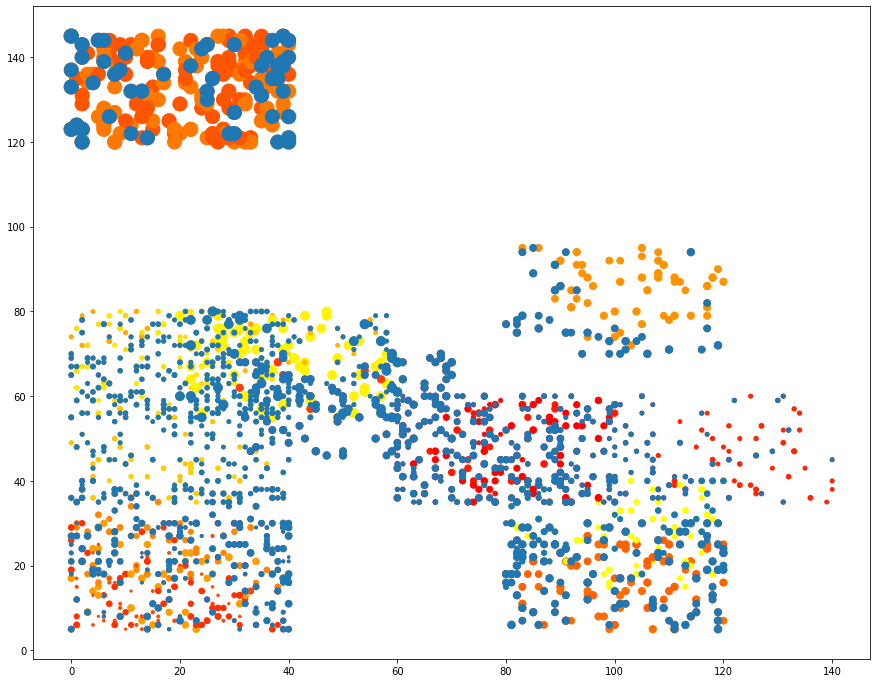

In [116]:
pyplot.scatter(training_Features.to_numpy()[:, 0],training_Features.to_numpy()[:, 1],training_Features.to_numpy()[:, 2],c=training_class_numbers, cmap='autumn')
pyplot.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],model.support_vectors_[:,2])

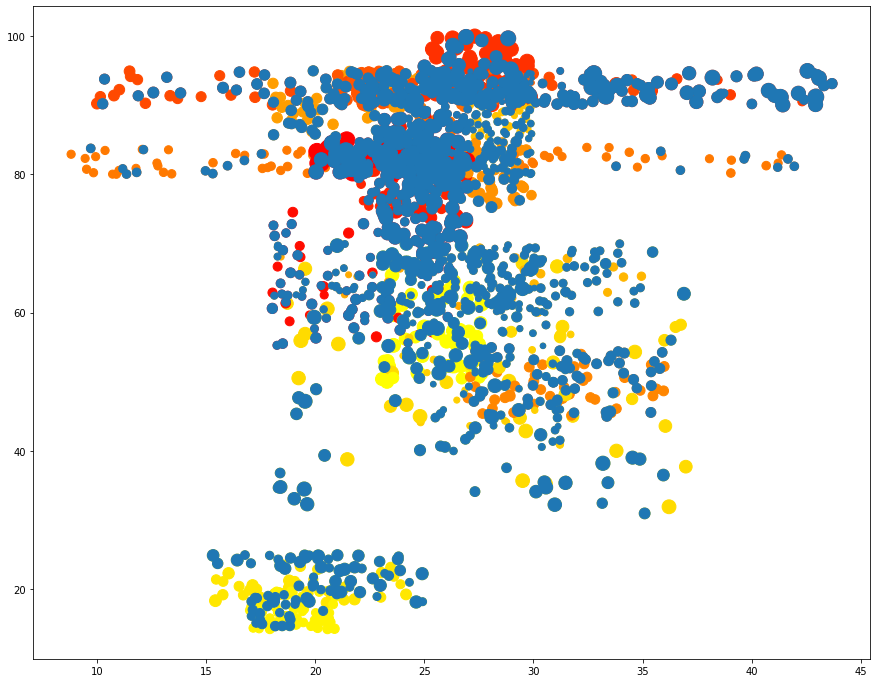

In [117]:
pyplot.scatter(training_Features.to_numpy()[:, 3],training_Features.to_numpy()[:, 4],training_Features.to_numpy()[:, 6],c=training_class_numbers, cmap='autumn')
pyplot.scatter(model.support_vectors_[:,3],model.support_vectors_[:,4],model.support_vectors_[:,6])

Text(0.5, 0, 'Step count')

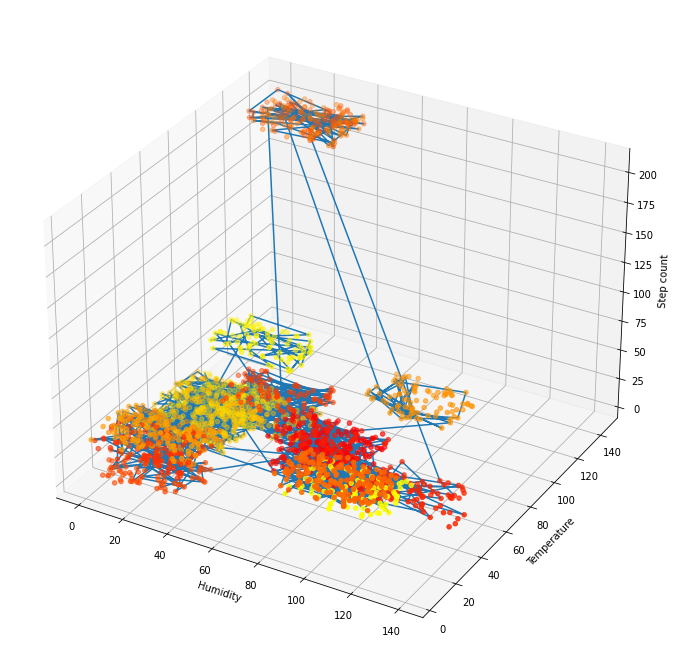

In [113]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(training_Features.to_numpy()[:, 0], training_Features.to_numpy()[:, 1] ,training_Features.to_numpy()[:, 2],c=training_class_numbers, cmap='autumn')
plotter.plot3D(model.support_vectors_[:,0],model.support_vectors_[:,1],model.support_vectors_[:,2])
plotter.set_xlabel('N')
plotter.set_ylabel('P')
plotter.set_zlabel('K')

Text(0.5, 0, 'rainfall')

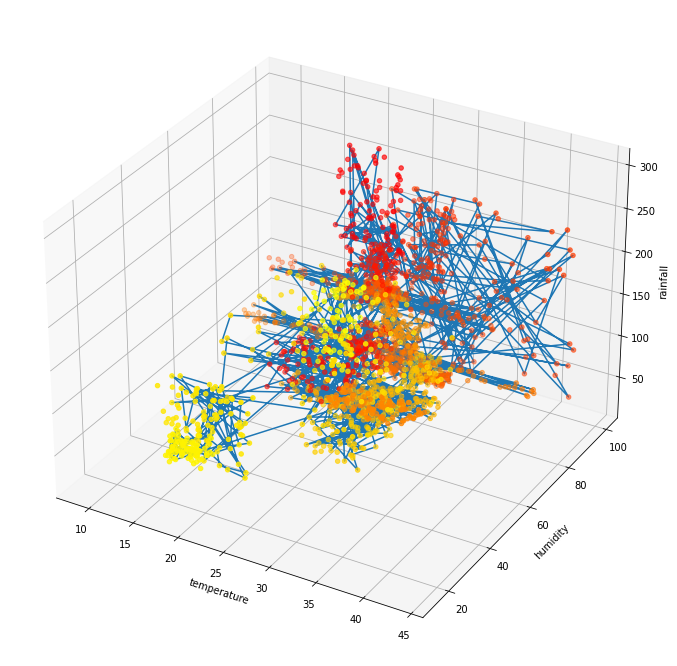

In [118]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(training_Features.to_numpy()[:, 3], training_Features.to_numpy()[:, 4] ,training_Features.to_numpy()[:, 6],c=training_class_numbers, cmap='autumn')
plotter.plot3D(model.support_vectors_[:,3],model.support_vectors_[:,4],model.support_vectors_[:,6])
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

#### Now model is Trained 👆

## ________________________________________________________________________

## Optional Part 👇
### checking model on training data to check training accuracy (not needed)

              precision    recall  f1-score   support

        rice       1.00      1.00      1.00        97
       maize       1.00      1.00      1.00        91
        jute       0.96      1.00      0.98        91
      cotton       1.00      1.00      1.00        90
     coconut       1.00      1.00      1.00        95
      papaya       1.00      0.99      0.99        94
      orange       0.97      1.00      0.98        87
       apple       1.00      1.00      1.00        95
   muskmelon       0.79      1.00      0.88        88
  watermelon       0.94      1.00      0.97        91
      grapes       0.94      0.99      0.97        85
       mango       1.00      0.97      0.98        93
      banana       1.00      1.00      1.00        96
 pomegranate       0.99      0.91      0.95        89
      lentil       1.00      1.00      1.00        89
   blackgram       1.00      1.00      1.00        87
    mungbean       1.00      1.00      1.00        92
   mothbeans       1.00    

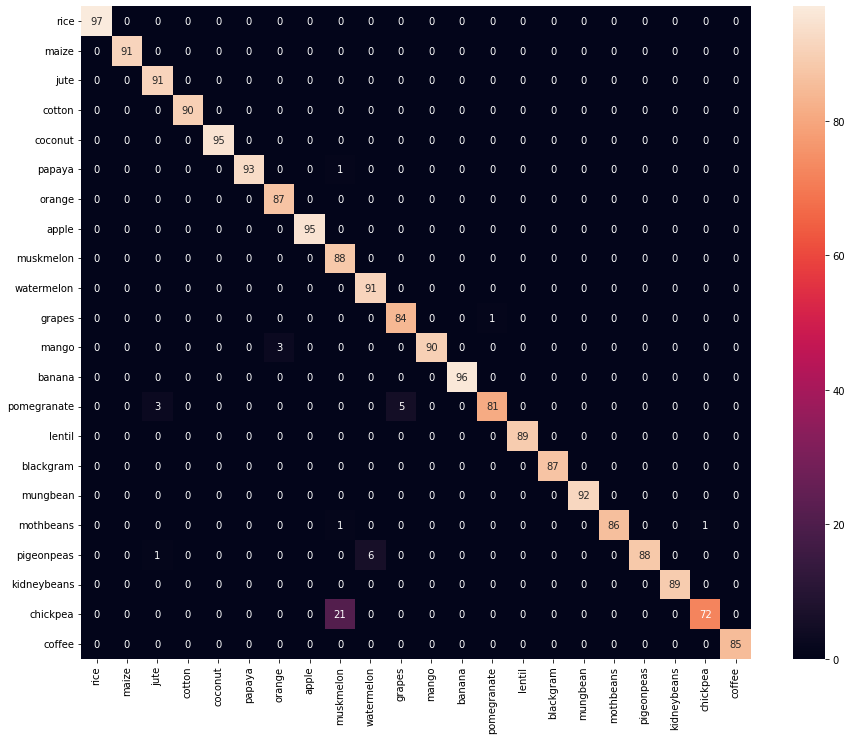

In [119]:
training_predicted_values=model.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(training_Labels,training_predicted_values,target_names=classes_list))

Training accuracy is 98%

# ________________________________________

# Now Testing the model 👇

In [120]:
predicted_values=model.predict(testing_Features)

In [121]:
predicted_values

array(['rice', 'maize', 'pigeonpeas', 'muskmelon', 'kidneybeans', 'jute',
       'mango', 'mungbean', 'chickpea', 'banana', 'watermelon', 'cotton',
       'pigeonpeas', 'muskmelon', 'banana', 'watermelon', 'mungbean',
       'kidneybeans', 'lentil', 'cotton', 'lentil', 'banana', 'cotton',
       'maize', 'maize', 'pomegranate', 'mungbean', 'watermelon', 'jute',
       'cotton', 'mungbean', 'watermelon', 'rice', 'watermelon',
       'muskmelon', 'orange', 'blackgram', 'banana', 'orange', 'jute',
       'kidneybeans', 'mothbeans', 'mungbean', 'coffee', 'grapes',
       'mothbeans', 'papaya', 'muskmelon', 'maize', 'banana', 'cotton',
       'rice', 'muskmelon', 'pomegranate', 'kidneybeans', 'jute',
       'blackgram', 'mothbeans', 'muskmelon', 'pomegranate', 'jute',
       'cotton', 'chickpea', 'coffee', 'jute', 'jute', 'mungbean',
       'pomegranate', 'chickpea', 'muskmelon', 'chickpea', 'mango',
       'grapes', 'lentil', 'grapes', 'watermelon', 'grapes', 'coconut',
       'banana', 'w

### Following will show that what is actual value and what is predicted by model 👇

In [122]:
predicted_values=list(predicted_values)
testing_Labels=list(testing_Labels)
print("Actual Values --> Predicted values")
for i in range(len(predicted_values)):
    print("          ",testing_Labels[i]," --> ",predicted_values[i])

Actual Values --> Predicted values
           rice  -->  rice
           maize  -->  maize
           pigeonpeas  -->  pigeonpeas
           muskmelon  -->  muskmelon
           kidneybeans  -->  kidneybeans
           jute  -->  jute
           mango  -->  mango
           mungbean  -->  mungbean
           chickpea  -->  chickpea
           banana  -->  banana
           watermelon  -->  watermelon
           cotton  -->  cotton
           pigeonpeas  -->  pigeonpeas
           muskmelon  -->  muskmelon
           banana  -->  banana
           watermelon  -->  watermelon
           mungbean  -->  mungbean
           kidneybeans  -->  kidneybeans
           lentil  -->  lentil
           cotton  -->  cotton
           lentil  -->  lentil
           banana  -->  banana
           cotton  -->  cotton
           maize  -->  maize
           maize  -->  maize
           pomegranate  -->  pomegranate
           mungbean  -->  mungbean
           watermelon  -->  watermelon
           jute

## plotting the confusion matrix for model of tested data 👇

In [123]:
classification_data=confusion_matrix(testing_Labels,predicted_values)

In [124]:
classification_data

array([[ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,

<AxesSubplot:>

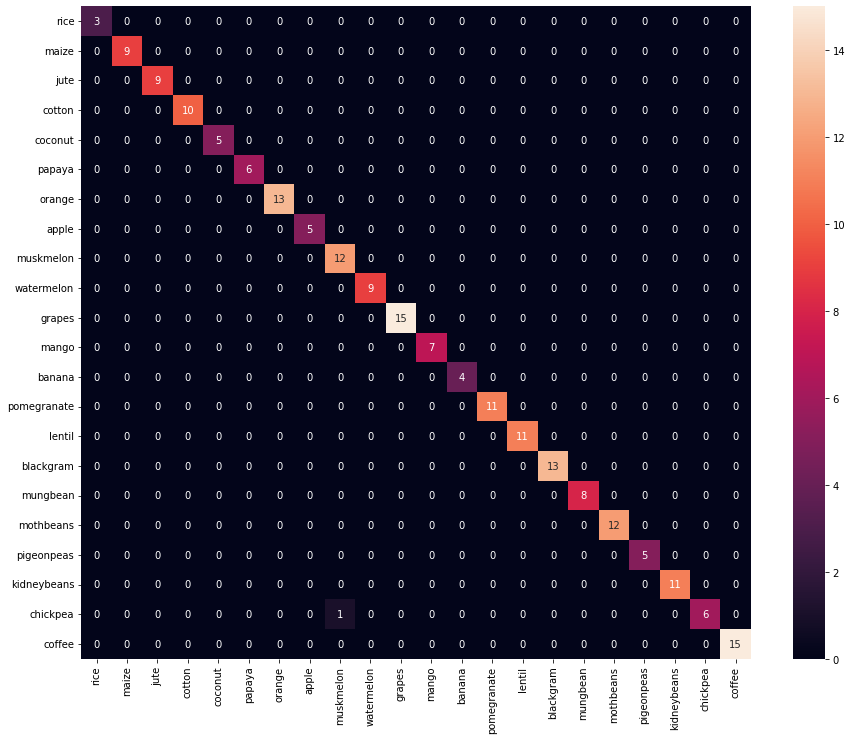

In [128]:
seaborn.heatmap(classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)

## This is the calculation of accuracy of the model and precision of the respective classes 👇

In [129]:
print(classification_report(testing_Labels,predicted_values,target_names=classes_list))

              precision    recall  f1-score   support

        rice       1.00      1.00      1.00         3
       maize       1.00      1.00      1.00         9
        jute       1.00      1.00      1.00         9
      cotton       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00         5
      papaya       1.00      1.00      1.00         6
      orange       1.00      1.00      1.00        13
       apple       1.00      1.00      1.00         5
   muskmelon       0.92      1.00      0.96        12
  watermelon       1.00      1.00      1.00         9
      grapes       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00         7
      banana       1.00      1.00      1.00         4
 pomegranate       1.00      1.00      1.00        11
      lentil       1.00      1.00      1.00        11
   blackgram       1.00      1.00      1.00        13
    mungbean       1.00      1.00      1.00         8
   mothbeans       1.00    

## Testing on new Data 👇
for,


1) N  = 30       <br/>
2) P  = 25       <br/>
3) K  =   29     <br/>
4) temperature= 30        <br/>
5) humidity=49       <br/>
6) ph= 5    <br/>
7) rainfall= 95       <br/>

##### (Correct Output Should be Mango)

In [139]:
new_data=[30,25,29,30,49,5,95]
print(model.predict([new_data])[0])

mango
